In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

plt.style.use('ggplot')
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['figure.figsize'] = (40,6)

# Payoff

Text(0, 0.5, 'Call option price')

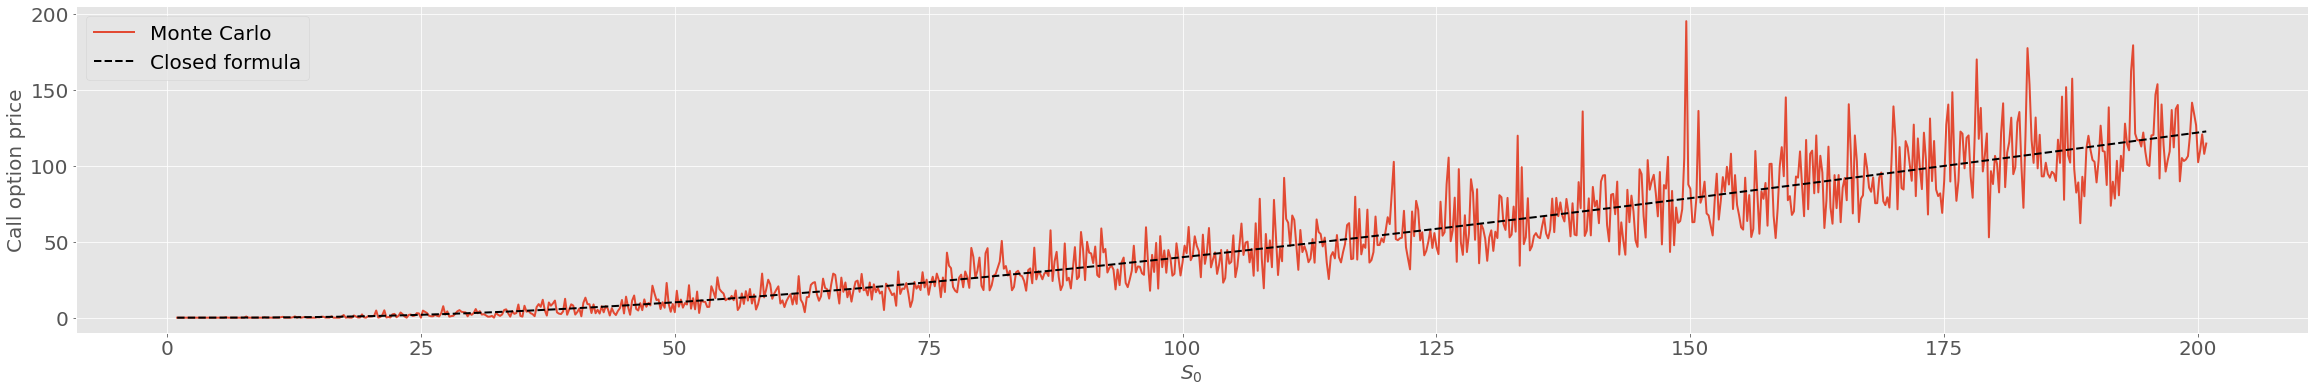

In [29]:
figure = plt.figure()
plt.plot(pd.read_csv('results_call.csv').set_index('S0'), label='Monte Carlo')
plt.plot(pd.read_csv('results_call_bs.csv').set_index('S0'), label='Closed formula', color='black', linestyle='--')
plt.legend()
plt.xlabel('$S_0$')
plt.ylabel('Call option price')
# plt.title('Call option price')

Text(0, 0.5, 'Barrier option price')

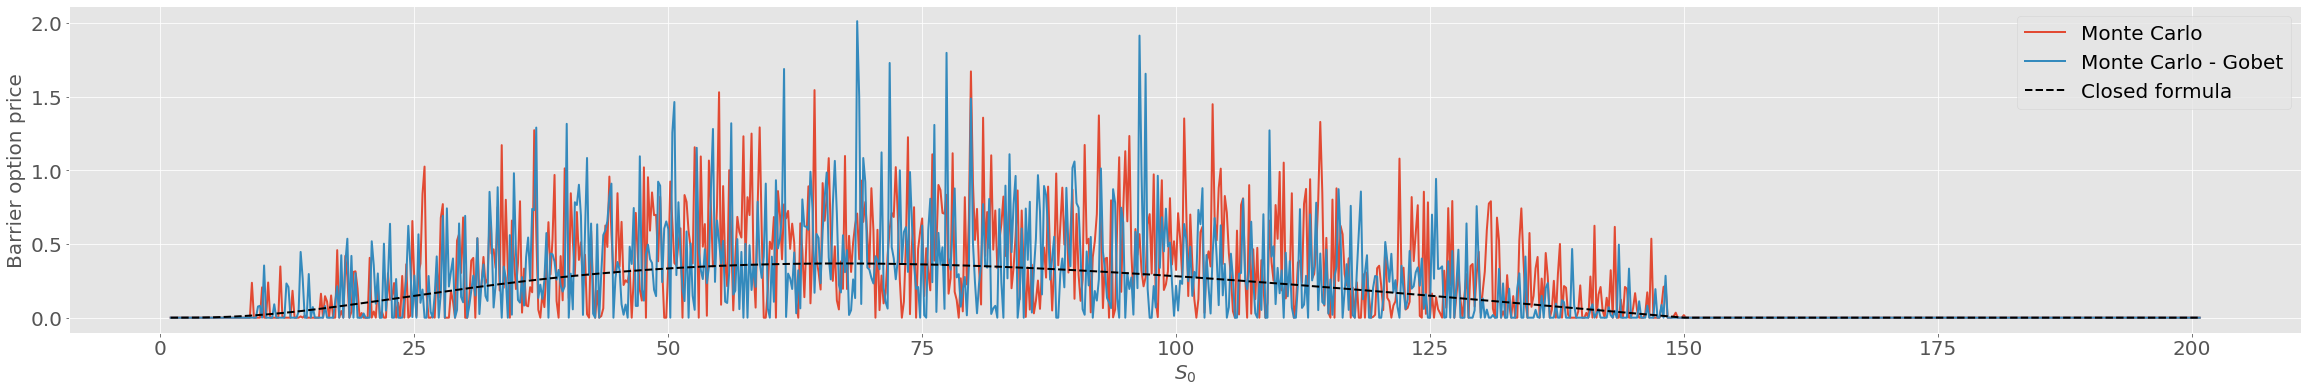

In [31]:
figure = plt.figure()
plt.plot(pd.read_csv('results_barrier.csv').set_index('S0'), label='Monte Carlo')
plt.plot(pd.read_csv('results_barrier_gobet.csv').set_index('S0'), label='Monte Carlo - Gobet')
plt.plot(pd.read_csv('results_barrier_bs.csv').set_index('S0'), label='Closed formula', color='black', linestyle='--')
plt.legend()
plt.xlabel('$S_0$')
plt.ylabel('Barrier option price')
# plt.title('Barrier option price')

Text(0, 0.5, 'Double no touch option price')

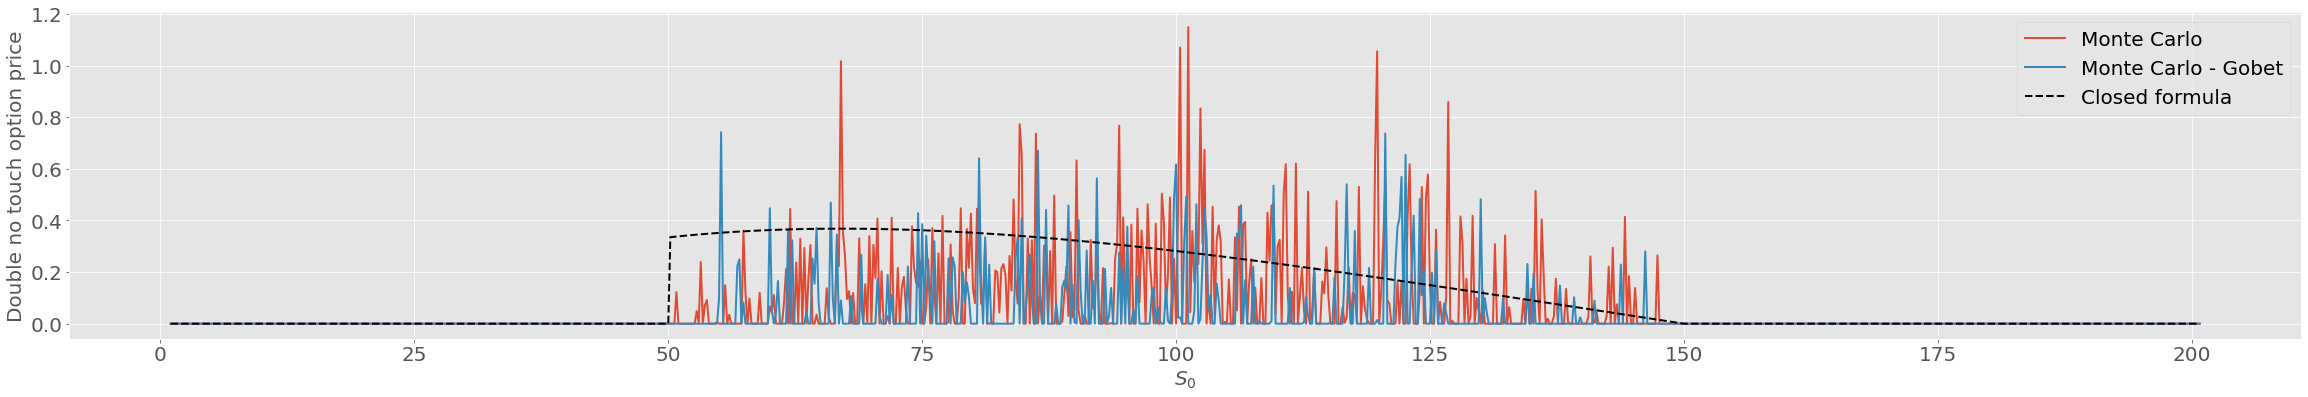

In [32]:
figure = plt.figure()
plt.plot(pd.read_csv('results_dnt.csv').set_index('S0'), label='Monte Carlo')
plt.plot(pd.read_csv('results_dnt_gobet.csv').set_index('S0'), label='Monte Carlo - Gobet')
plt.plot(pd.read_csv('results_dnt_bs.csv').set_index('S0'), label='Closed formula', color='black', linestyle='--')
plt.legend()
plt.xlabel('$S_0$')
plt.ylabel('Double no touch option price')
# plt.title('Double no touch option price')

In [15]:
df_barrier = pd.read_csv("debug_barrier.csv", header=None)
df_barrier.columns = ['Sj-1', 'Sj', 'proba']
df_barrier

,Sj-1,Sj,proba
0,100.0000,103.1570,3.664880e-204
1,103.1570,95.0419,7.391720e-211
2,95.0419,100.6030,9.008870e-262
3,100.6030,105.6780,1.276030e-188
4,105.6780,110.5000,6.870940e-137
...,...,...,...
72,146.9840,143.7550,1.749110e-01
73,143.7550,141.8810,7.393350e-03
74,141.8810,145.6650,3.028780e-02
75,145.6650,139.8650,1.589250e-02


# Killed diffusion

C:\Users\cleme\AppData\Local\Temp/ipykernel_30616/3945480644.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax1.plot(df_barrier['Sj'], 'b-', label='$S$: (Price)', color = 'green', marker='o')
C:\Users\cleme\AppData\Local\Temp/ipykernel_30616/3945480644.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(df_barrier['proba'], 'r-', alpha=0.5, label='$p(z_1, z_2, T/N)$: (Probability of in-between hit)', color = 'blue',  linestyle='dashdot')
C:\Users\cleme\AppData\Local\Temp/ipykernel_30616/3945480644.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(df_barrier['proba'], 'r-', alpha=0.5, label='$p(z_1, z_2, T/N)$: (Proba

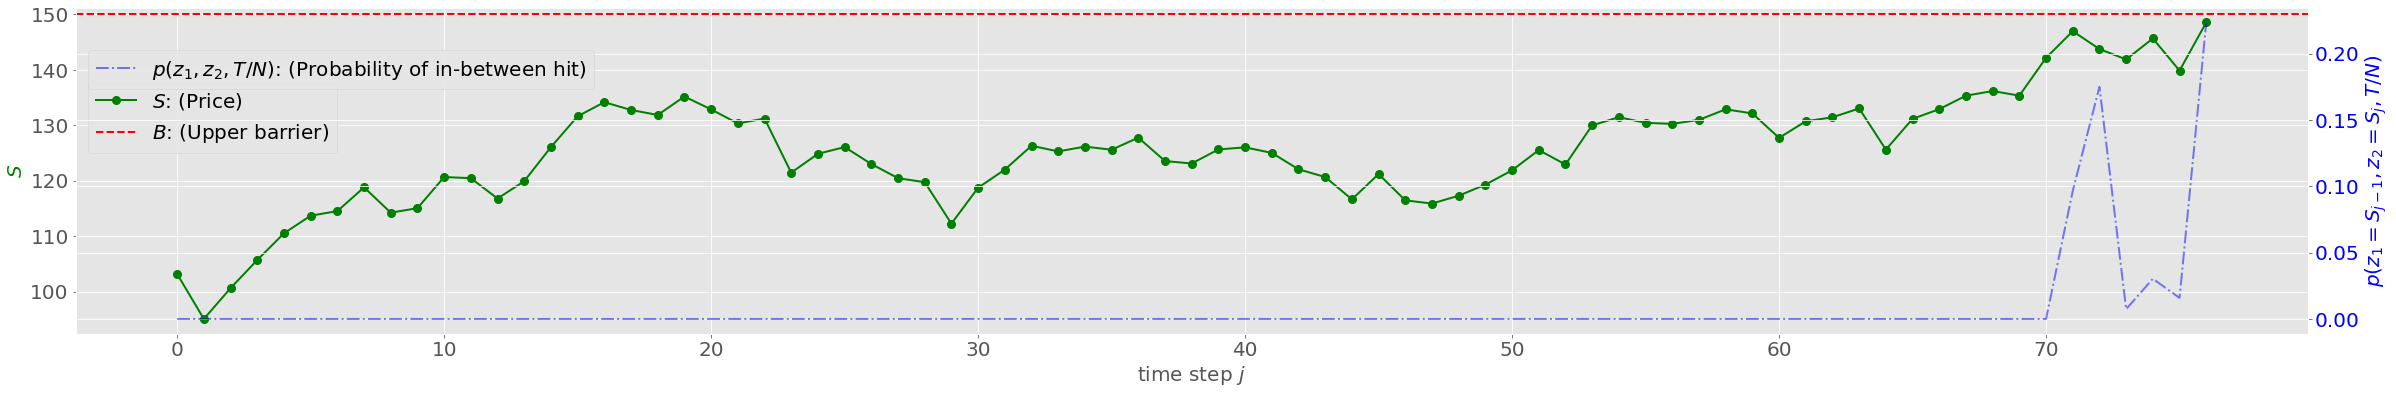

In [26]:
# horizontal plot with shared x axis : on top : S[j-1] and S[j] and on bottom the probability
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df_barrier['Sj'], 'b-', label='$S$: (Price)', color = 'green', marker='o')
ax2.plot(df_barrier['proba'], 'r-', alpha=0.5, label='$p(z_1, z_2, T/N)$: (Probability of in-between hit)', color = 'blue',  linestyle='dashdot')
# plt.title('Diffusion of the underlying - Barrier option')
# / ax1 : horizontal lines with B = 120 and L = 50
ax1.axhline(y=150, linestyle='--', label='$B$: (Upper barrier)', color = 'red')
ax1.set_xlabel('time step $j$')
ax1.set_ylabel('$S$', color='green')
ax2.set_ylabel('$p(z_1=S_{j-1}, z_2=S_j, T/N)$', color='blue')
# set ax2 ticks to blue
for tl in ax2.get_yticklabels():
    tl.set_color('b')
# ax2.set_yscale('log')
ax1.legend(loc='upper left', bbox_to_anchor=(0.001, 0.8))
ax2.legend(loc='upper left', bbox_to_anchor=(0.001, 0.9))
plt.show()

In [17]:
df_dnt = pd.read_csv("debug_dnt.csv", header=None)
df_dnt.columns = ['Sj-1', 'Sj', 'proba']
df_dnt

,Sj-1,Sj,proba
0,100.0000,100.7090,0.000000
1,100.7090,100.1510,0.000000
2,100.1510,99.6971,0.000000
3,99.6971,99.8641,0.000000
4,99.8641,101.2290,0.000000
...,...,...,...
261,126.6700,128.8750,0.000000
262,128.8750,129.5540,0.000000
263,129.5540,133.9340,0.000000
264,133.9340,145.3920,0.000260


C:\Users\cleme\AppData\Local\Temp/ipykernel_30616/2653258638.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax1.plot(df_dnt['Sj'], 'b-', label='$S$: (Price)', color = 'green', marker='o')
C:\Users\cleme\AppData\Local\Temp/ipykernel_30616/2653258638.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(df_dnt['proba'], 'r-', alpha=0.5, label='$p(z_1, z_2, T/N)$: (Probability of in-between hit)', color = 'blue',  linestyle='dashdot')
C:\Users\cleme\AppData\Local\Temp/ipykernel_30616/2653258638.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(df_dnt['proba'], 'r-', alpha=0.5, label='$p(z_1, z_2, T/N)$: (Probability of in

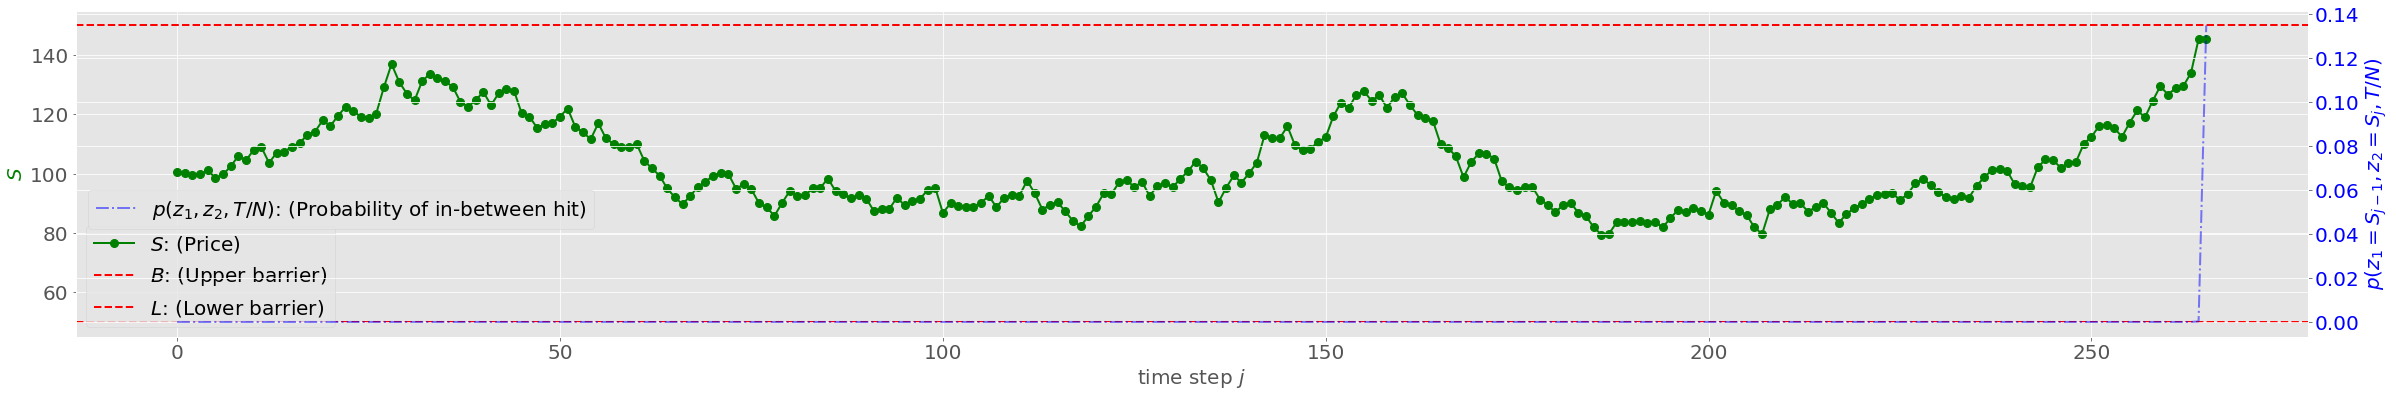

In [33]:
# horizontal plot with shared x axis : on top : S[j-1] and S[j] and on bottom the probability
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df_dnt['Sj'], 'b-', label='$S$: (Price)', color = 'green', marker='o')
ax2.plot(df_dnt['proba'], 'r-', alpha=0.5, label='$p(z_1, z_2, T/N)$: (Probability of in-between hit)', color = 'blue',  linestyle='dashdot')
# plt.title('Diffusion of the underlying - Double no touch option')
# / ax1 : horizontal lines with B = 120 and L = 50
ax1.axhline(y=150, linestyle='--', label='$B$: (Upper barrier)', color = 'red')
ax1.axhline(y=50, linestyle='--', label='$L$: (Lower barrier)', color = 'red')
ax1.set_xlabel('time step $j$')
ax1.set_ylabel('$S$', color='green')
ax2.set_ylabel('$p(z_1=S_{j-1}, z_2=S_j, T/N)$', color='blue')
# set ax2 ticks to blue
for tl in ax2.get_yticklabels():
    tl.set_color('b')
# ax2.set_yscale('log')
ax1.legend()
ax2.legend(loc='upper left', bbox_to_anchor=(0.001, 0.48))
plt.show()

# (Weak) Convergence

In [27]:
df_barrier.values

array([[1.92313 ],
       [1.35839 ],
       [0.949837],
       [0.858664],
       [0.513979],
       [0.431761],
       [0.550482],
       [0.404792],
       [0.318456],
       [0.399773],
       [0.365729],
       [0.442786],
       [0.320279],
       [0.245375],
       [0.286193],
       [0.217216],
       [0.384421],
       [0.279243],
       [0.138241]])

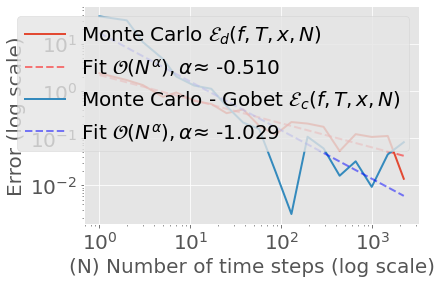

In [5]:
figure = plt.figure()
theoretical_barrier = pd.read_csv('../src/convergence_barrier_theoretical.csv', header=None).values[0][0]
df_barrier = pd.read_csv("../src/convergence_barrier.csv").set_index('N')
df_barrier_gobet = pd.read_csv("../src/convergence_barrier_gobet.csv").set_index('N')

# order of convergence : log-log linear regression to find the slope of the curve
X = np.log(df_barrier.index.values).reshape(-1, 1)
y = np.log(np.abs(df_barrier.values.flatten() - theoretical_barrier))
reg = LinearRegression().fit(X, y)
y_gobet = np.log(np.abs(df_barrier_gobet.values.flatten() - theoretical_barrier))
reg_gobet = LinearRegression().fit(X, y_gobet)

# plot the fitted line
alpha = reg.coef_[0]
beta = reg.intercept_
plt.plot(np.abs(df_barrier - theoretical_barrier), label='Monte Carlo ' + "$\\mathcal{E}_d(f, T, x, N)$")
plt.plot(np.exp(X), np.exp(alpha*X + beta), linestyle='--', color='red', alpha=0.5, label='Fit $\mathcal{O}(N^{\\alpha}), \\alpha$' + f"\u2248 {alpha:.3f}")

alpha_gobet = reg_gobet.coef_[0]
beta_gobet = reg_gobet.intercept_
epsilon_c = np.exp(beta_gobet)
plt.plot(np.abs(df_barrier_gobet - theoretical_barrier), label='Monte Carlo - Gobet ' + "$\\mathcal{E}_c(f, T, x, N)$")
plt.plot(np.exp(X), np.exp(alpha_gobet*X + beta_gobet), linestyle='--', color='blue', alpha=0.5, label='Fit $\mathcal{O}(N^{\\alpha}), \\alpha$' + f"\u2248 {alpha_gobet:.3f}")

plt.legend()
plt.xlabel('(N) Number of time steps (log scale)')
plt.ylabel('Error (log scale)')
# set x axis to log scale
plt.xscale('log')
plt.yscale('log')
plt.show()
